## Final Project Submission

Please fill out:
* Students names (Group 23): 
    1. Sophy Owuor
    2. Ndanu Mwatu
    3. Denis Ochieng
    4. Laban Kariuki
* Student pace: part time
* Scheduled project review date/time: 11th September 2023 / 2400Hrs
* Instructor name: 
* Blog post URL:


## 1.0 Data Understanding

The data used for analysis is housing data of King's County. In this section, we import necessary libraries, load the data into a dataframe and review the data using the shape, describe and info methods to gain an understanding of the data. Further, we load the datafile containing the column descriptions of the data. 
Additionally, we use the value_counts method to gain further insights into the numeric and categorical features that inform the data preparation phase.

In [1]:
# These are some of the libraries we will be using for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import datasets
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Here we load the kc_house_data
df = pd.read_csv("data/kc_house_data.csv")
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# This data provides explanation on the fields in our dataframe
f=open("data/column_names.md", 'r')
column_names=[]
col_names={}

for i in f:
  column_names.append(i.split("-"))

column_names
cn=pd.DataFrame(column_names)

cn.drop(index=[0,10,12,14,16],axis=0, inplace=True)

cn.columns=["column_name", "column_description"]

cn['column_name']=cn['column_name'].map(lambda x:x.lstrip('*'))
cn.iloc[:,[0,1]]

,column_name,column_description
1,`id`,Unique identifier for a house\n
2,`date`,Date house was sold\n
3,`price`,Sale price (prediction target)\n
4,`bedrooms`,Number of bedrooms\n
5,`bathrooms`,Number of bathrooms\n
6,`sqft_living`,Square footage of living space in the home\n
7,`sqft_lot`,Square footage of the lot\n
8,`floors`,Number of floors (levels) in house\n
9,`waterfront`,Whether the house is on a waterfront\n
11,`view`,Quality of view from house\n


In [7]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [8]:
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [9]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1913.0        1
2120.0        1
1281.0        1
2130.0        1
602.0         1
Name: sqft_basement, Length: 304, dtype: int64

## 2.0 Data cleaning

In this study, the first step was data pre-processing, which involved cleaning the Kings County dataset. Data cleaning was initiated by identifying and removing duplicate rows to ensure the integrity of the dataset. Duplicate rows can distort analytical results and create bias, so they were eliminated to maintain data quality. Following this, cells containing irrelevant or extraneous values that were not pertinent to our analysis were carefully identified and filtered out. This process helped ensure that the dataset used for subsequent analyses was free from any misleading or non-contextual information.

The King County data used for this analysis was loaded from a .csv file extracted from the GitHub repository. This dataset initially had 21597 records and 21 fields. A review of the data using python’s DataFrame library methods .info() and .describe() identiied missing values in the data fields. Three of the fields in the data had null values i.e waterfront, view and year the house was renovated. These three fields were dropped from the dataset leaving the data with 18 fields.  The DaraFrame method .value_counts() was further used to review the data field objects for inconsistent with general datatype contained in those fields and observed that 454 records in the condition field had question marks (?) instead of actual house conditons. The condition field was therefore dropped. Based on the remaining dataset, a review of the unique identifiers in the data revealed instances of duplicates which were similarly dropped from the data reducing the data field records to 21420 records and 17 columns.

In [10]:
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

In [11]:
df.drop_duplicates(subset=['id'], inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [12]:
df.drop(columns=['waterfront', 'view', 'yr_renovated', 'sqft_basement'], inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,1530,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2310,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,1020,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,Average,8 Good,1600,2004,98027,47.5345,-122.069,1410,1287


In [13]:
# df.to_csv('21420_17.csv', index=False)

## 3.0 Data Analysis

### 3.1 Descriptive analysis of the price of houses in King's County

In [14]:
df["price"].describe().apply(lambda x: format(x, 'f'))

count      21420.000000
mean      540739.303922
std       367931.109953
min        78000.000000
25%       322500.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

We note that the average price of a house in King's county is USD 540,296.

We also note that 75% of the houses cost above USD 322,000 and 25% of the properties cost above USD 645,000.

There is a wide variation in terms of house prices - this can be denoted from the standard deviation of USD 367,368; with the minimum cost of a house being USD 78,000 and the highest priced house USD 7,700,000.

## 3.2 Data Models

### I. We begin with a simple linear regression as the base model

#### Selecting variable of choice using correlation

In [15]:
# Correlation of price with other variables excluding itself

# First we specify the fields to exclude from correlation
excluded_fields = ['id', 'long', 'lat', 'zipcode']

# Then we calculate our correlations with 'price' for all remaining fields, excluding excluded_fields
price_correlations = df.drop(['price'] + excluded_fields, axis=1).corrwith(df['price'])
price_correlations

bedrooms         0.309453
bathrooms        0.526229
sqft_living      0.701875
sqft_lot         0.089111
floors           0.256286
sqft_above       0.605294
yr_built         0.052906
sqft_living15    0.584549
sqft_lot15       0.082438
dtype: float64

**Explanation of the correlation output above**

We observe strong positive correlation in price of property and the following variables;
   1. 'bathrooms' (0.526229),
   2. 'sqft_living' (0.701875),
   3. 'sqft_above' (0.605294),
   4. 'sqft_living15' (0.584549)

This means that as the number of bathrooms, square footage of living space, square footage above ground, and square footage of interior housing living space for the nearest 15 neighbors increases, the 'price' of the house also tends to increases with a higher percentage than the other variables.

Moderate Positive Correlations is observed in number of 'bedrooms' (0.309453) and 'floors' (0.256286). An increase in the number of bedrooms or floors is associated with a moderate increase in 'price.'

Weak positive Correlations are observed in  'sqft_lot' (0.089111) and 'sqft_lot15' (0.082438). These correlations suggest that there is a relatively weaker positive relationship between the square footage of the lot and the 'price' of the property.

Finally very weak positive correlation is observed on the 'yr_built' (0.052906) suggesting that the year the property was built has a minimal impact on the 'price.'

The `sqft_living` feature has the highest correlation with `price`. 
We use this to build the base model, a simple linear regression model.

#### We visualize the relationshp between the independent variable(sqft_living) and the dependent variable (price)

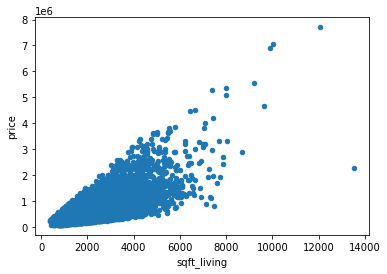

In [16]:
# Using a scatter plot to visualize the relationship of sqft_living with price
df.plot.scatter(x='sqft_living', y='price');

#### We then build the simple linear regression baseline model

In [17]:
simple_formula = 'price ~ sqft_living'
simple_model = ols(simple_formula, df).fit()
simple_model_summary = simple_model.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.080e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:20:50   Log-Likelihood:            -2.9764e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.475e+04   4437.427    -10.084      0.000   -5.34e+04   -3.61e+04
sqft_living   281.0616      1.949    144.207      0.000     277.241     284.882
==============================================================================
Omnibus:                    14687.843   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           538458.356
Skew:                           2.822   Prob(JB):                         0.00
Kurtosis:                      26.905   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Results of the baseline model 

The regression line we found was: price = 281sqft_living - 44749 

The overall model is statistically significant as the F-statistic p-value is below 0.05 (our significance threshold).

The sqft_living is found to be statistically significant, with t-statistic p-values below 0.05. The intercept is also statistically significant.

The model explains about 49% of the variance in price.

The coefficient of sqft_living  is about 281 meaning that for each increase of 1 sqft in the Square footage of living space in the home, we see an associated increase of USD281 in price.

#### Plot the regression line 

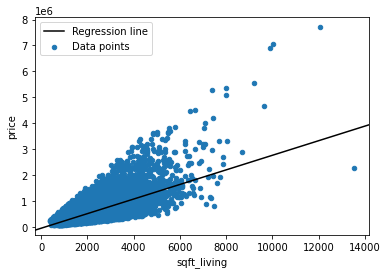

In [18]:
fig, ax = plt.subplots()
df.plot.scatter(x='sqft_living', y='price', label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=simple_model, label="Regression line", ax=ax, color="black")
ax.legend();

### II. We then build a multiple linear regression  as the second model

#### In this second model, a multiple linear regression we use the following numeric features as independent variables

In [19]:
y = df['price']

x_1 = df['bedrooms']
x_2 = df['bathrooms']
x_3 = df['sqft_living']
x_4 = df['sqft_lot']
x_5 = df['floors']
x_6 = df['sqft_above']
x_7 = df['yr_built']
x_8 = df['sqft_living15']
x_9 = df['sqft_lot15']

second_multiple_formula = 'y ~ x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9'
second_multiple_model = ols(second_multiple_formula, df).fit()
second_multiple_model_summary = second_multiple_model.summary()

second_multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3143.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:20:51   Log-Likelihood:            -2.9588e+05
No. Observations:               21420   AIC:                         5.918e+05
Df Residuals:                   21410   BIC:                         5.919e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.877e+06   1.37e+05     50.250      0.000    6.61e+06    7.14e+06
x_1        -6.647e+04   2243.333    -29.629      0.000   -7.09e+04   -6.21e+04
x_2         7.026e+04   3880.612     18.106      0.000    6.27e+04    7.79e+04
x_3          258.8105      5.006     51.696      0.000     248.998     268.624
x_4            0.0179      0.057      0.312      0.755      -0.094       0.130
x_5         5.946e+04   4181.044     14.221      0.000    5.13e+04    6.77e+04
x_6          -10.3915      4.982     -2.086      0.037     -20.156      -0.627
x_7        -3574.5666     71.132    -50.252      0.000   -3713.991   -3435.142
x_8           92.7828      3.828     24.238      0.000      85.280     100.286
x_9           -0.6947      0.088     -7.930      0.000      -0.866      -0.523
==============================================================================
Omnibus:                    15420.444   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           719109.599
Skew:                           2.955   Prob(JB):                         0.00
Kurtosis:                      30.763   Cond. No.                     4.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Results of the Second Model and comparison to baseline model

The second model, which is a multiple linear regression, is overall statistically significant as the F-statistic p-value is below 0.05 (our significance threshold).

The new model explains about 56.9% of the variance in Prices of houses which is about 7.6% more than the variance explained in the base line model (the simple regression model).

8 out of the 9 independent variables i.e. bedrooms, bathrooms, sqft_living, floors, sqft_above, yr_built, sqft_living15 and sqft_lot15 are found to be statistically significant as they have p-values below 0.05. The intercept is also statistically significant.

The p-value for sqft_lot at 0.755, shows the sqft_lot is not statistically significant in the multiple linear regression model as it's more than the alpha of 0.05.

We therefore, see an improvement in terms of variance explained (R-Squared) in the new model compared to the baseline model, though one value is not statistically significant. 


#### Create Partial Regression Plots for Features

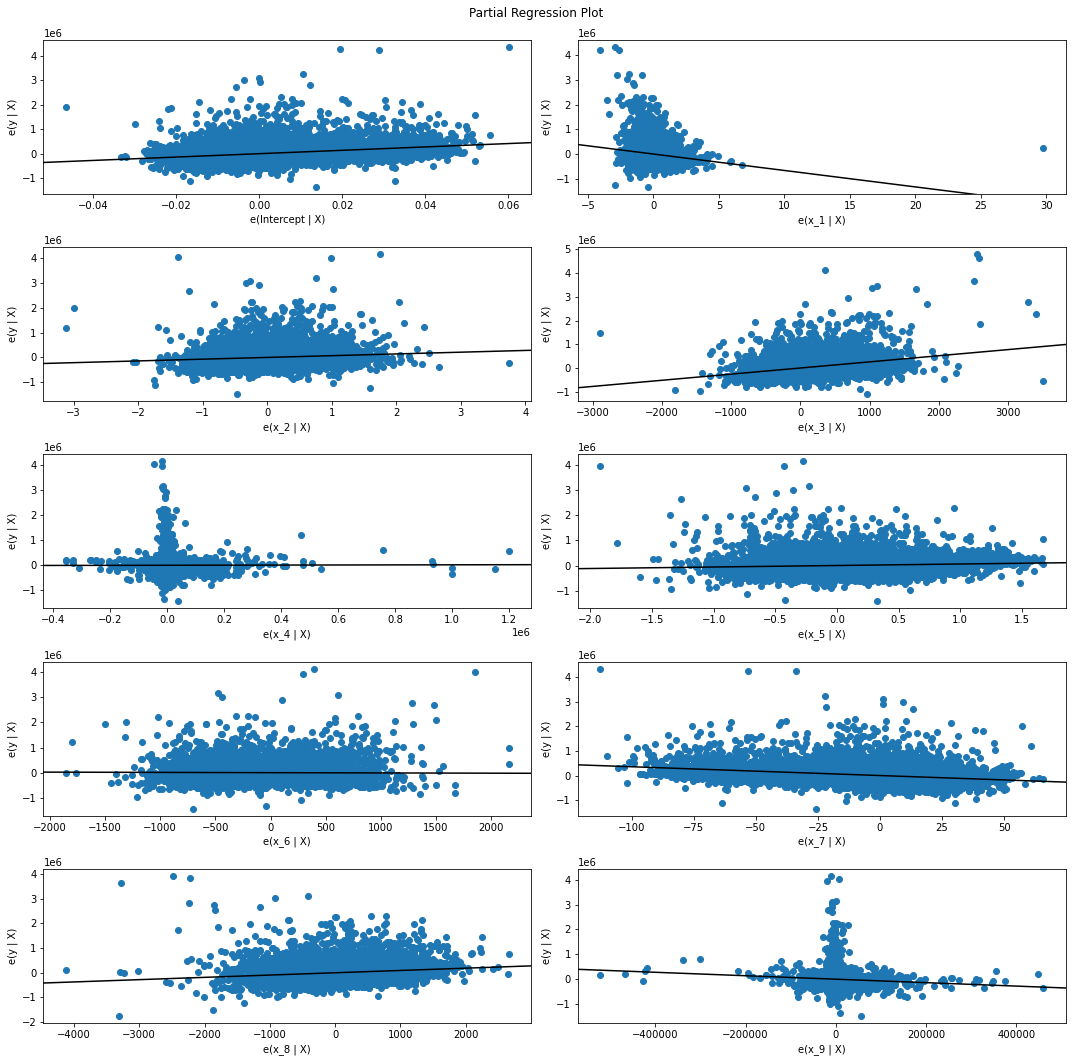

In [20]:
fig = plt.figure(figsize=(15,15))
fig = sm.graphics.plot_partregress_grid(second_multiple_model, fig=fig)

With more variables as predictors, the partial regression plot for each individual variable becomes a weaker predictor. 
This is demonstrated by the clustering of points over the variable plots instead of clean linear relationships. 
Similarly, majority of the gradients for the variable plots appear to be closer to zero with the exception of the sqft_living partial regression plot.

### III. We then build another multiple linear regression including a categorical feature as the third model

#### In this third model, we use a categorical feature as well as all the numeric features.

We selected the 'condition' of a house as the categorical variable of choice given that this is a useful metric against which potential real estate investors are able to tell how good the overall condition of a house is as well as how well maintained it is.

In [21]:
df['condition'].value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

#### We set up variables for Regression - all the numeric features used in model 2 and the categorical variable 'condition'

In [22]:
#  new dataframe containing the variables of interest i.e all the numeric features used in model 2 
# and the categorical variable 'condition'
df_2 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 'condition']]
df_2.head()          

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,condition
0,3,1.00,1180,5650,1.0,1180,1955,1340,5650,Average
1,3,2.25,2570,7242,2.0,2170,1951,1690,7639,Average
2,2,1.00,770,10000,1.0,770,1933,2720,8062,Average
3,4,3.00,1960,5000,1.0,1050,1965,1360,5000,Very Good
4,3,2.00,1680,8080,1.0,1680,1987,1800,7503,Average


In [23]:
# One-hot encode the categorical predictor 'condition' 
df_2 = pd.get_dummies(df_2, columns=['condition'])
df_2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,3,1.00,1180,5650,1.0,1180,1955,1340,5650,1,0,0,0,0
1,3,2.25,2570,7242,2.0,2170,1951,1690,7639,1,0,0,0,0
2,2,1.00,770,10000,1.0,770,1933,2720,8062,1,0,0,0,0
3,4,3.00,1960,5000,1.0,1050,1965,1360,5000,0,0,0,0,1
4,3,2.00,1680,8080,1.0,1680,1987,1800,7503,1,0,0,0,0


**'Poor'** is the worst condition i.e. 'worn out' as per the explanation provided in the King County Assessor Website. 

We therefore choose it as the baseline column that we shall drop.

In [24]:
# Dropping "Poor" as the baseline
df_2.drop("condition_Poor", axis=1, inplace=True)
# Remove the space in the Very Good column
df_2.columns = df_2.columns.str.replace(' ', '')
df_2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_VeryGood
0,3,1.00,1180,5650,1.0,1180,1955,1340,5650,1,0,0,0
1,3,2.25,2570,7242,2.0,2170,1951,1690,7639,1,0,0,0
2,2,1.00,770,10000,1.0,770,1933,2720,8062,1,0,0,0
3,4,3.00,1960,5000,1.0,1050,1965,1360,5000,0,0,0,1
4,3,2.00,1680,8080,1.0,1680,1987,1800,7503,1,0,0,0


In [25]:
third_multiple_model = sm.OLS(y, sm.add_constant(df_2))
third_multiple_results = third_multiple_model.fit()

print(third_multiple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2187.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:20:54   Log-Likelihood:            -2.9585e+05
No. Observations:               21420   AIC:                         5.917e+05
Df Residuals:                   21406   BIC:                         5.918e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.529e+06   1.49

#### Results of the third model

The third model, a multiple linear regression using the numerical variables in the second model and one categorical variable 'condition', is overall statistically significant as the F-statistic p-value is below 0.05.

This third model explains about 57% of the variance in Prices of houses. Although our third model improves on the second, the change is only a 0.1% change which is not a material change.

2 out of the 9 numeric variables i.e. sqft_lot and sqft_above are not statistically significant while the remaining 7 and the intercept are still statistically significant with p-values below 0.05. 

Considering the categorical variables, only 'Good' and 'Very good' are statistically significant with p-values below 0.05 while 'Fair'and 'Average' have p-values greater than 0.05, therefore are not statistically significant.

Compared to houses with poor condition, those with fair and average conditions have an increase in price of about USD 38,830 and USD 89,340 respectively. Conversely, compared to houses with poor condition, those with good and very good condition have an increaase of price of USD 101,100 and USD 133,600.

# 4.0 Findings

First, a descriptive analysis was conducted to gain insight into the price field's characteristics. Descriptive statistics, such as mean, median, and standard deviation, were computed to summarize the price distribution. 

From the **descriptive analysis** on the house prices, the following was observed:
* We noted that the average price of a house in King's county is USD 540,296.
* We also noted that 75% of the houses cost above USD 322,000 and 25% of the properties cost above USD 645,000.
* There is a wide variation in terms of house prices - this can be denoted from the standard deviation of USD 367,368; with the minimum cost of a house being USD 78,000 and the highest priced house USD 7,700,000.

Secondly, a **geospatial analysis** is done using QGIS that is further described in the accompanying presentation.

Thirdly, the analysis focuses on building **iterative linear regression models** to investigate which factors influence the price of properties the most. 

The first thing we did was a **correlation analysis** and we observed was that there was a strong positive correlation between the price of a property and a number of variables. The following four variables showing the highest correlation; 'bathrooms' (0.526229), 'sqft_living' (0.701875), 'sqft_above' (0.605294), and 'sqft_living15' (0.584549).


**Models**

**The first model** was a simple linear regression between the price of a property and the square footage of the living space in the property(the variable with the highest correlation with price). This model which explained 49% of the variance in price showed a statistically significance between price and square foot living of a property.

**The second model** was a multiple linear regression with the price of property as the dependent variable and the following variables used as independent variables;Bedrooms, Bathrooms, Sqft_living, Sqft_lot, Floors, Sqft_above, Year built, Sqft_living15, and Sqft_lot15

The findings showed that the second model explained 56.9% of the variance in Prices of houses which is 7.6% more than the variance explained in the first model (indicating a better fit).
Out of the 9 independent variables used in the model, only Sqft_lot was not statistically significant with the price of a property. The other independent variables showed a significant relationship with the price of property.

**The third model** used categorical features as well as all the numeric features.The findings showed that third model explained about 57% of the variance in Prices of houses. From the findings we observe that out of the 9 (numeric) independent variables only sqft_lot and sqft_above did not have a significant relationship with the prices of properties in King’s county.
Considering the categorical variables, the third model showed 'Good' and 'Very good' property conditions to be statistically significant (with p-values below 0.05) while 'Fair'and 'Average' have p-values greater than 0.05, therefore are not statistically significant.

Compared to houses with poor condition, those with fair and average conditions have an increase in price of about USD 38,830 and USD 89,340 respectively. Conversely, compared to houses with poor condition, those with good and very good condition have an increaase of price of USD 101,100 and USD 133,600.
